# 宣伝費による売上の主成分分析のグラフを作成する

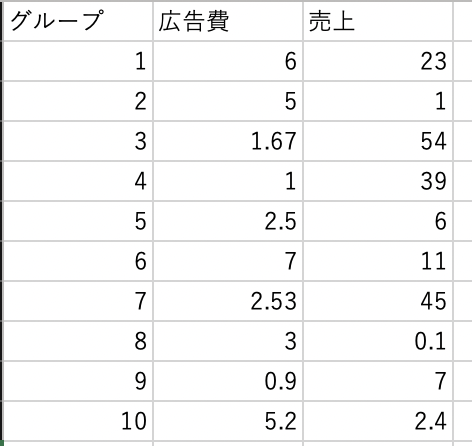

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, init_printing
init_printing()

[(0.0, 25.0), Text(0, 0.5, 'kyakusuu'), (0.0, 25.0), Text(0.5, 0, 'hiyou')]

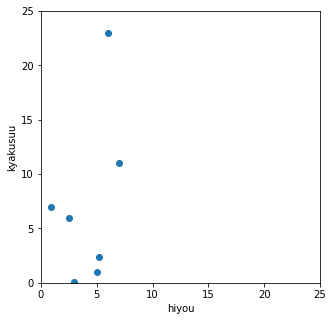

In [65]:

num_01 = [6,5,1.67,1,2.5,7, 2.53, 3, 0.9,5.2]
num_02 = [23, 1, 54, 39, 6, 11, 45, 0.1, 7, 2.4]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(num_01,num_02)
ax.set(xlabel="hiyou",ylabel="kyakusuu",xlim=(0,25),ylim=(0,25))

In [68]:
x = {i:0 for i in range(1,10+1)}  
for i in range(1,10+1):  # 10個の２次元特徴ベクトルの定義
    x[i] = sp.Matrix([[num_01[i-1]],[num_02[i-1]]])  

In [92]:
# 重心ベクトルの定義
x[0] = sp.zeros(2,1)  # 0ベクトルに初期化
for i in range(1,11):
    x[0] += x[i]     
x[0] = x[0]/10
x[0]

⎡-6.96⎤
⎢     ⎥
⎣-37.7⎦

In [73]:
# 原点=重心ベクトル
for i in range(1,11):
    x[i] -= x[0]

In [74]:
# 共分散行列を求める
V = sp.zeros(2,2)  # ２行２列の0行列で初期化
for i in range(1,11):
    V += x[i]* x[i].T    
V = V/10
V

⎡52.66018   246.505 ⎤
⎢                   ⎥
⎣246.505   1786.3445⎦

In [78]:
# 共分散行列の固有値、固有ベクトルを求める
eign = V.eigenvects()
eign

⎡⎛                     ⎡⎡-0.990420223336862⎤⎤⎞  ⎛                     ⎡⎡-0.138
⎢⎜18.2920175011587, 1, ⎢⎢                  ⎥⎥⎟, ⎜1820.71266249884, 1, ⎢⎢      
⎣⎝                     ⎣⎣0.138086136905053 ⎦⎦⎠  ⎝                     ⎣⎣-0.990

086136905053⎤⎤⎞⎤
            ⎥⎥⎟⎥
420223336862⎦⎦⎠⎦

In [77]:
u1 = eign[1][2][0]  # 大きい固有値に対する固有ベクトルをu1とした
u2 = eign[0][2][0]    

In [81]:
def dot(x,y):
    return (x.T*y)[0,0]

# 変換行列Uを作るために固有ベクトルu1,u2の長さを１に正規化
l1 = sp.sqrt(dot(u1,u1))
l2 = sp.sqrt(dot(u2,u2))
u1 = u1/l1
u2 = u2/l2    

⎛⎡-0.138086136905053⎤  ⎡-0.990420223336862⎤⎞
⎜⎢                  ⎥, ⎢                  ⎥⎟
⎝⎣-0.990420223336862⎦  ⎣0.138086136905053 ⎦⎠

In [85]:
# 変換行列U：正規化された固有ベクトルu1,u2を並べるだけ
U = sp.Matrix([[u1[0],u2[0]],[u1[1],u2[1]]])
U

⎡-0.138086136905053  -0.990420223336862⎤
⎢                                      ⎥
⎣-0.990420223336862  0.138086136905053 ⎦

In [87]:
# 元データの第一主成分（最大固有値に対応する固有ベクトルへの射影）を求める
data1 = []  # 元データの第一主成分のみを入れる箱（完成すれば１０個の要素からなる）
for i in range(1,10+1):
    data1.append(float(dot(x[i],x[0])))  #各特徴ベクトルを第一主成分の報告に射影している
data1  # 新しいデータ（各特長ベクトルは１次元）

In [89]:
# 第一主成分、第二主成分の軸の可視化
sp.var("x1")
y1 = u1[1]/u1[0]*(x1-x[0][0])+x[0][1]  # 重心x[0]を通り第一固有ベクトルu1に平行な直線
y2 = u2[1]/u2[0]*(x1-x[0][0])+x[0][1]  # 重心x[0]を通り第ニ固有ベクトルu2に平行な直線

[(0.0, 25.0), Text(0, 0.5, 'kyakusuu'), (0.0, 25.0), Text(0.5, 0, 'hiyou')]

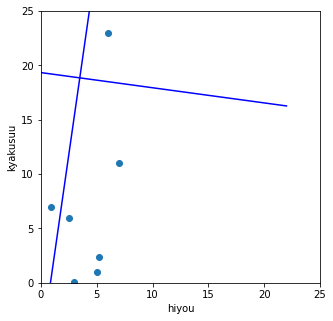

In [91]:

num_01 = [6,5,1.67,1,2.5,7, 2.53, 3, 0.9,5.2]
num_02 = [23, 1, 54, 39, 6, 11, 45, 0.1, 7, 2.4]
X1 = np.linspace(0,22)
Y1 = [y1.subs(x1,a1) for a1 in X1]
Y2 = [y2.subs(x1,a1) for a1 in X1]
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(num_01,num_02)
ax.plot(X1,Y1,color="b")
ax.plot(X1,Y2,color="b")
ax.set(xlabel="hiyou",ylabel="kyakusuu",xlim=(0,25),ylim=(0,25))